# Zak's Week 2 Project

## Suicide Data

In [23]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import Series
from matplotlib import pyplot

plt.rcParams['figure.figsize'] = (20,20)

In [3]:
df = pd.read_csv("../Project/master.csv")

In [4]:
df.dtypes

country             object
year                 int64
sex                 object
age                 object
suicides_no          int64
population           int64
suicides100kpop    float64
country-year        object
HDI for year       float64
gdp_for_year        object
gdp_per_capita       int64
generation          object
dtype: object

In [5]:
country_ratings = ['impoverished', 'poor', 'average', 'normal', 'rich']

df['country_ratings'] = pd.qcut(df[df.gdp_per_capita>0]['gdp_per_capita'],5, labels=country_ratings)

# Gender and Suicide Rates

Below I am graphing the relationship between suicide rate between men and women over time

In [6]:
men = df[df.sex == 'male']
women = df[df.sex == 'female']
men.suicides100kpop.mean()

20.239328540618263

In [7]:
women.suicides100kpop.mean()

5.3928662832494885

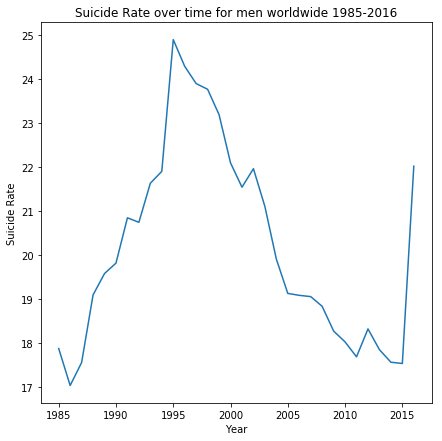

In [33]:
men1 = men.groupby(men.year)['suicides100kpop'].sum()
men2 = men.groupby(men.year).size()
men3 = men1/men2
men3 = pd.DataFrame(men3)
m3n4=men3.reset_index()
m3n4.columns=['year', 'suicide_rate']
plt.plot(m3n4.year, m3n4.suicide_rate)
plt.title("Suicide Rate over time for men worldwide 1985-2016")
plt.xlabel("Year")
plt.ylabel("Suicide Rate");
plt.rcParams['figure.figsize'] = (5,5)

In [9]:
m3n4

,year,suicide_rate
0,1985,17.875486
1,1986,17.033993
2,1987,17.556296
3,1988,19.095408
4,1989,19.581314
5,1990,19.818906
6,1991,20.849792
7,1992,20.747462
8,1993,21.636154
9,1994,21.906520


It appears that suicides among men spiked between 1986 until 1995, rising approximately 31.63% to 24.91 suicides for every 100,000 men from 17.03 suicides for every 100,000 men.  From then until around 2015, the suicide rate dropped dramatically to about 17.53 per 100,000 men, and spiked again in 2016.  This spike in 2016 is likely due to the fact that most of the data from 2016 is from European countries, which tend to have higher suicide rates than other regions/continents

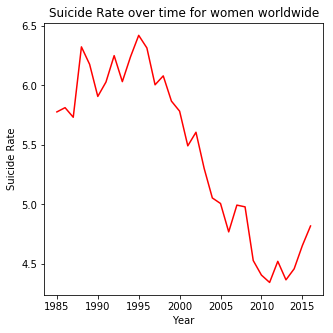

In [43]:
women1 = women.groupby(women.year)['suicides100kpop'].sum()
women2 = women.groupby(women.year).size()
women3 = women1/women2
women3 = pd.DataFrame(women3)
wom3n4 = women3.reset_index()
wom3n4.columns=['year', 'suicide_rate']
plt.plot(wom3n4.year, wom3n4.suicide_rate, color = 'red')
plt.title("Suicide Rate over time for women worldwide")
plt.xlabel("Year")
plt.ylabel("Suicide Rate")
plt.rcParams['figure.figsize'] = (5,5);

In [11]:
wom3n4

,year,suicide_rate
0,1985,5.776910
1,1986,5.812674
2,1987,5.732130
3,1988,6.323401
4,1989,6.176827
5,1990,5.907005
6,1991,6.027969
7,1992,6.249667
8,1993,6.031256
9,1994,6.240025


It appears that suicide rates among women has had a generally downward trend since 1995, where it peaked at 6.42 suicides per 100,000 women.  It is worth noting that suicides for men peaked in 1995 as well.  Since then, suicide rates for women have trended downward, troughing in 2011 at 4.34 suicides per 100,000 women.  Again, there is a sharp upswing in 2016, which may be attributed to the data bias noted above in the explanation for the males

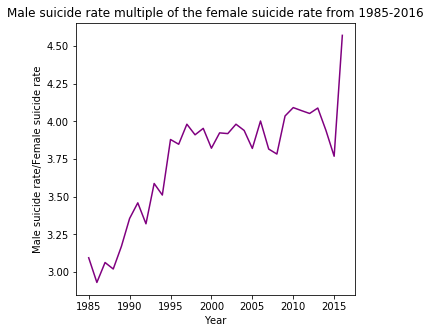

In [44]:
womenx= women1/women2
menx = men1/men2
mw = menx/womenx
mw = pd.DataFrame(mw)
mwr = mw.reset_index()
mwr.columns=['year', 'mw']
plt.plot(mwr.year, mwr.mw, color = 'purple')
plt.title("Male suicide rate multiple of the female suicide rate from 1985-2016")
plt.xlabel("Year")
plt.ylabel("Male suicide rate/Female suicide rate");
plt.rcParams['figure.figsize'] = (5,5);

In [13]:
mwr.mw.mean()

3.7406393740073915

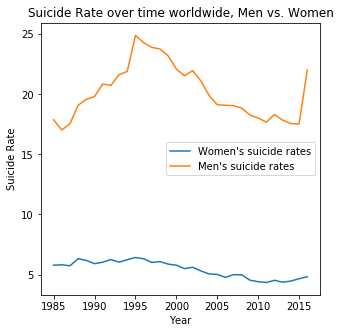

In [45]:
df_wm = pd.DataFrame([wom3n4.suicide_rate, m3n4.suicide_rate, m3n4.year]).T
df_wm.columns = ['women_sr', 'men_sr', 'year']
plt.plot(df_wm.year, df_wm.women_sr)
plt.plot(df_wm.year, df_wm.men_sr)

plt.legend(["Women's suicide rates", "Men's suicide rates"])
plt.title("Suicide Rate over time worldwide, Men vs. Women")
plt.xlabel("Year")
plt.ylabel("Suicide Rate");
plt.rcParams['figure.figsize'] = (5,5)

The male suicide rate has consistently remained above the female suicide rate, as show in the purple graph.  Just below it, I note that the male suicide rate was, on average, 3.74 times the female suicide rate between 1985 and 2016.

## Suicide Rates vs. GDP and correlation to other variables

Below I am checking for correlations between the columns of the dataframe and Suicide Rate

Specifically, I take a look at scatterplots of suicide rates vs. GDP per capita in each country.

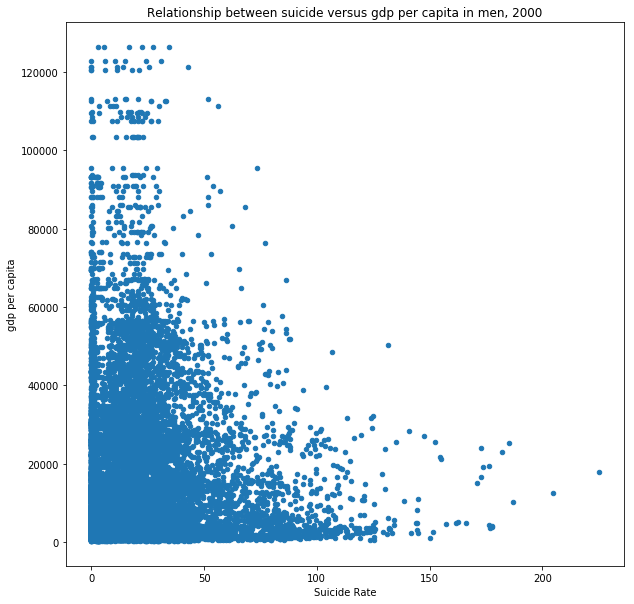

In [55]:
men.plot.scatter(x="suicides100kpop",y="gdp_per_capita")

plt.title("Relationship between suicide versus gdp per capita in men, 2000")
plt.xlabel("Suicide Rate")
plt.ylabel("gdp per capita");
plt.rcParams['figure.figsize'] = (10,10);

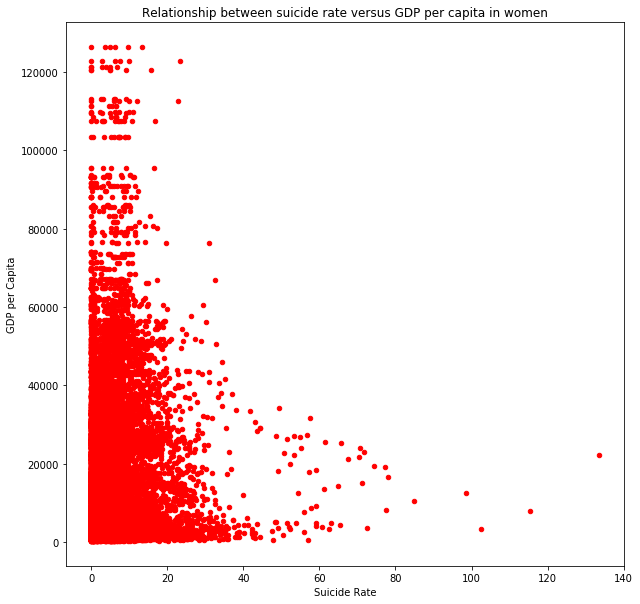

In [57]:
women.plot.scatter(x="suicides100kpop",y="gdp_per_capita", color="red")
plt.title("Relationship between suicide rate versus GDP per capita in women")
plt.xlabel("Suicide Rate")
plt.ylabel("GDP per Capita");
plt.rcParams['figure.figsize'] = (10,10);

In [58]:
df.corr().suicides100kpop

year              -0.039037
suicides_no        0.306604
population         0.008285
suicides100kpop    1.000000
HDI for year       0.074279
gdp_per_capita     0.001785
Name: suicides100kpop, dtype: float64

There is no correlation between suicide rate and any variable in this dataset other than number of suicides.  GDP per capita and HDI have negligible correlation to suicide rate according to this data.

## Regional Statistics

In [59]:
df['region'] = "Other"
df['region'][df.country.isin(['Albania', 'Bosnia and Herzegovina', 'Croatia','Greece', 'Italy', 'Montenegro', \
                              'Malta','Portugal', 'San Marino', 'Serbia', 'Slovenia','Spain'])] = "Southern Europe"
df['region'][df.country.isin(['Denmark', 'Estonia','Finland', 'Iceland', 'Ireland', 'Latvia', \
                              'Lithuania', 'Norway', 'Sweden', 'United Kingdom'])] = "Northern Europe"
df['region'][df.country.isin(['Austria', 'Belgium', 'France', 'Germany', 'Luxembourg', \
                              'Netherlands', 'Switzerland'])] = "Western Europe"
df['region'][df.country.isin(['Russian Federation', 'Belarus', 'Bulgaria', 'Czech Republic', \
                              'Hungary', 'Poland', 'Romania', 'Slovakia', 'Ukraine', \
                              'Georgia'])] = "Eastern Europe"
df['region'][df.country.isin(['Antigua and Barbuda', 'Aruba', 'Bahamas', \
                              'Grenada', 'Saint Kitts and Nevis', 'Saint Lucia', 'Trinidad and Tobago', \
                             'Dominica', 'Saint Vincent and Grenadines', 'Jamaica'])] = "Caribbean"
df['region'][df.country.isin(['United States', 'Mexico', 'Canada', 'Puerto Rico'])] = 'North America'
df['region'][df.country.isin(['Argentina', 'Brazil', 'Belize', 'Cuba', \
                              'Chile', 'Colombia', 'Costa Rica', 'Ecuador', 'El Salvador'\
                             'Guatemala', 'Guyana', 'Nicaragua', 'Panama', 'Paraguay', 'Uruguay', 'Suriname'])] = "Latin America"
df['region'][df.country.isin(['Azerbaijan', 'Bahrain', 'Cyprus', 'Israel', \
                              'Kuwait', 'Oman', 'Qatar', 'Ecuador', 'El Salvador'\
                             'Turkey', 'United Arab Emirates'])] = "Middle East"
df['region'][df.country.isin(['Japan', 'Kazakhstan', 'Kyrgyzstan', 'Macau', \
                              'Mongolia', 'Philippines', 'Republic of Korea', 'Singapore', 'Sri Lanka'\
                             'Uzbekistan', 'Thailand', 'Turkmenistan'])] = "Orient"
df['region'][df.country.isin(['Cabo Verde', 'Maldives', 'Mauritius', 'Seychelles', \
                              'South Africa'])] = "Africa"
df['region'][df.country.isin(['Australia', 'New Zealand', 'Kiribati', 'Fiji'])] = "Oceania"

/Users/sandyleong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/sandyleong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/sandyleong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/sandyle

In [60]:
regions1 = df.groupby('region')['suicides100kpop'].sum()
regions2 = df.groupby('region')['suicides100kpop'].size()
regions3 = regions1/regions2
regions4 = pd.DataFrame(regions3)
regions = regions4.reset_index()
regions

,region,suicides100kpop
0,Africa,6.814113
1,Caribbean,5.027790
2,Eastern Europe,21.020553
3,Latin America,11.280181
4,Middle East,4.037085
5,North America,10.259672
6,Northern Europe,18.053159
7,Oceania,11.561831
8,Orient,16.708399
9,Other,7.558679


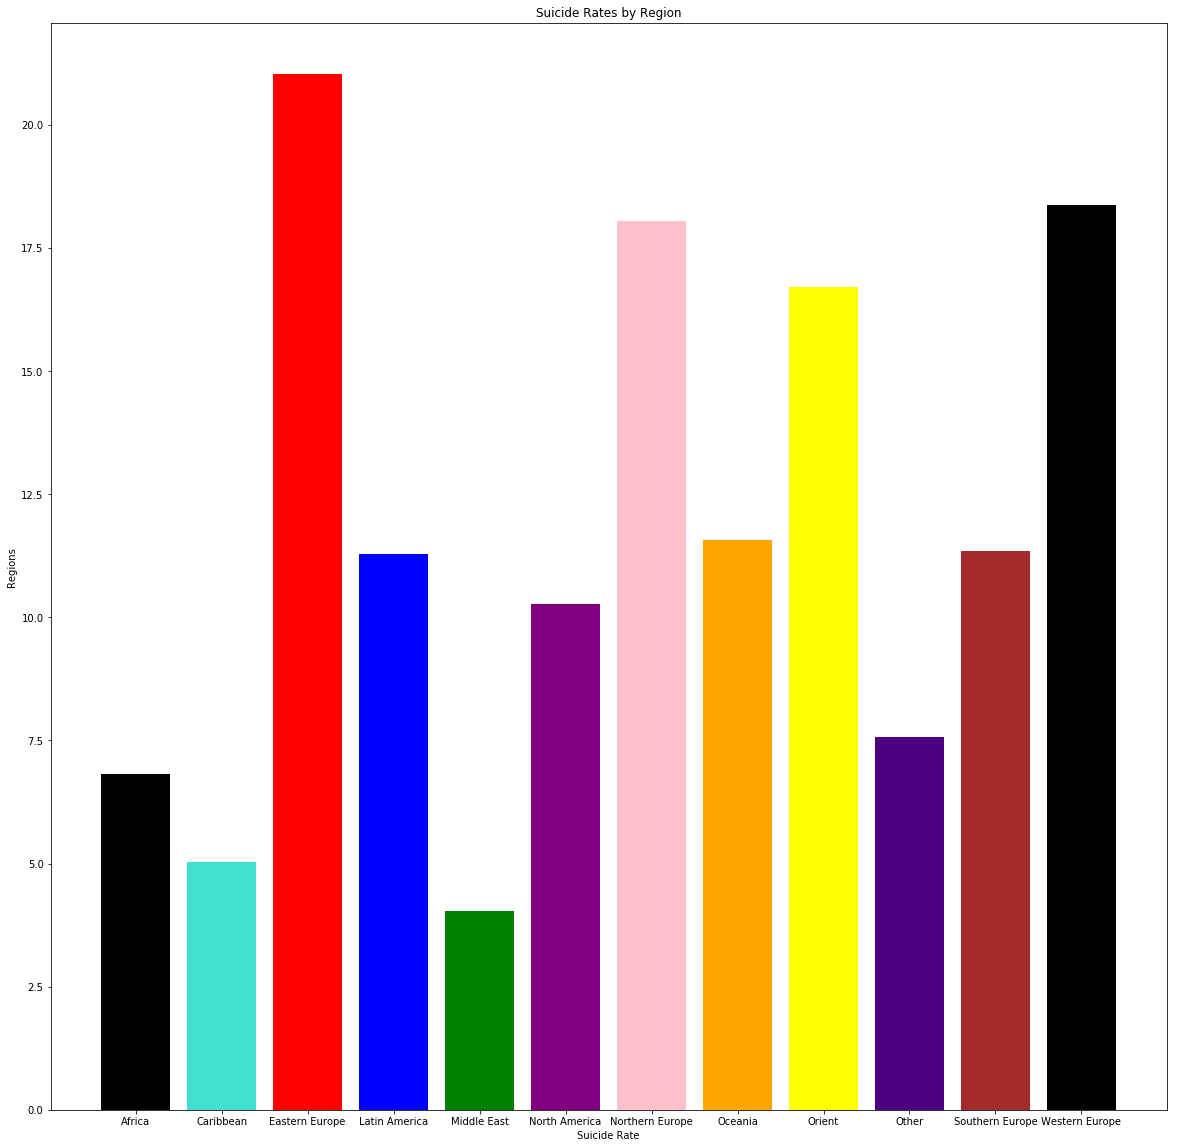

In [63]:
plt.bar(regions.region, regions.suicides100kpop, color = \
        ['black','turquoise','red', 'blue', 'green', 'purple', 'pink', 'orange', 'yellow', 'indigo', 'brown'])
plt.title("Suicide Rates by Region")
plt.xlabel("Suicide Rate")
plt.ylabel("Regions");
plt.rcParams['figure.figsize'] = (20,20);

In [20]:
df['continent'] = "Other"
df['continent'][df.region.isin(['Eastern Europe', 'Southern Europe', 'Western Europe', \
                               'Northern Europe'])] = "Europe"
df['continent'][df.region.isin(['Orient', 'Middle East'])] = "Asia"
df['continent'][df.region.isin(['North America', 'Latin America', 'Caribbean'])] = "The Americas"
df['continent'][df.region.isin(['Africa'])] = "Africa"
df['continent'][df.region.isin(['Oceania', 'Other'])] = "Oceania/other"

/Users/sandyleong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/sandyleong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/sandyleong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versu

In [21]:
continents1 = df.groupby('continent')['suicides100kpop'].sum()
continents2 = df.groupby('continent')['suicides100kpop'].size()
continents3 = continents1/continents2
continents4 = pd.DataFrame(continents3)
continents = continents4.reset_index()
continents

,continent,suicides100kpop
0,Africa,6.814113
1,Asia,11.303153
2,Europe,17.179659
3,Oceania/other,9.000882
4,The Americas,9.277141


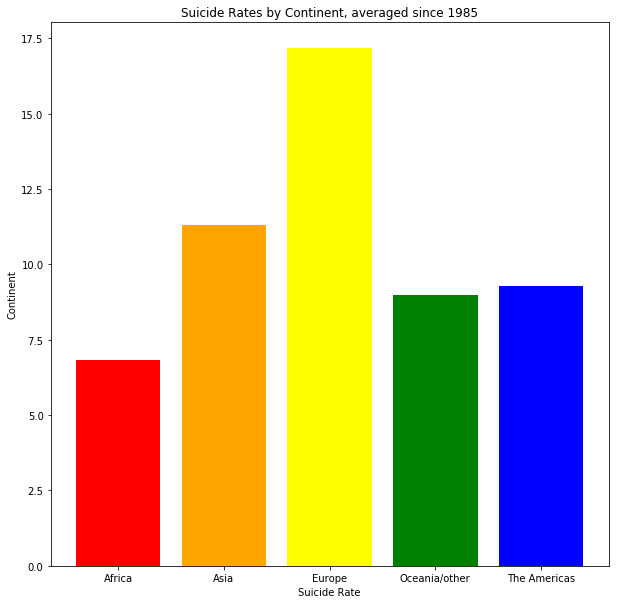

In [65]:
plt.bar(continents.continent, continents.suicides100kpop, color = \
        ['red', 'orange', 'yellow', 'green', 'blue', 'turquoise'])
plt.title("Suicide Rates by Continent, averaged since 1985")
plt.xlabel("Suicide Rate")
plt.ylabel("Continent");
plt.rcParams['figure.figsize'] = (10,10)

Here we see that Europe has by far the highest suicide rates in the world.  When we break it down, we can see that the three regions with the highest suicide rates are all in Europe (Eastern, Northern, and Western Europe).  These are followed by oriental countries.  Southern Europe has similar suicide rates as North America, Latin America, and Oceania.  Africa, the Caribbean, and the Middle East have the lowest suicide rates in the world, though it is worth noting that Africa has only five countries represented in this data set, and the countries represented make up a small fraction of the continent's 1.2 billion inhabitants.

All of the regions with the lowest suicide rates have hotter climates, while Eastern and Northern Europe have colder climates, and thus less sun.  We know that sun activates vitamin D in our bodies, and absence of sun can cause depression.  This is a probable answer as to why this data set shows such a difference in the suicide rates in colder climates than hotter ones.

As we have noted before, wealth of a country has negligible correlation to the suicide rate according to our data.  Eastern Europe and the Middle East both have significant histories of oppressive dictatorships, but Eastern Europeans commit suicide on average 5.2 times as often as Middle Easterners.  On the other hand, Western Europe has a strong history of democracy and freedom, but Western Europe and Eastern Europe share similar suicide rates, so we can discount that correlation.

There is also the aspect of culture that can be taken into account, but there is no quantifiable way to measure culture.  There are ways to measure dictatorships, such as the CATO Human Freedom Index, and we can measure sunlight and climate in these regions.  However, by just looking at the data culture is a possible avenue for further discovery of links to suicide rates, and we can discount oppressive dictatorships.